In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [3]:
# Importing Data Frame
df = pd.read_excel("EPL Transfer Spend.xlsx")
df.head()

,Team,Window,Season,Expenditure,Rank,Matches Played,Win,Draw,Lost,Points,Win Percent
0,Arsenal,Summer,22 - 23,132.06,1,16,14,1,1,43,0.875000
1,Manchester City,Summer,22 - 23,139.50,2,16,11,3,2,36,0.687500
2,Newcastle,Summer,22 - 23,136.00,3,17,9,7,1,34,0.529412
3,Manchester United,Summer,22 - 23,240.32,4,16,10,2,4,32,0.625000
4,Tottenham,Summer,22 - 23,169.90,5,17,9,3,5,30,0.529412


In [4]:
# Setting Index into Season and Window
df.set_index([df["Season"], df["Window"]], inplace = True)
df.head()

Team  Window   Season  Expenditure  Rank  \
Season  Window                                                          
22 - 23 Summer            Arsenal  Summer  22 - 23       132.06     1   
        Summer    Manchester City  Summer  22 - 23       139.50     2   
        Summer          Newcastle  Summer  22 - 23       136.00     3   
        Summer  Manchester United  Summer  22 - 23       240.32     4   
        Summer          Tottenham  Summer  22 - 23       169.90     5   

                Matches Played  Win  Draw  Lost  Points  Win Percent  
Season  Window                                                        
22 - 23 Summer              16   14     1     1      43     0.875000  
        Summer              16   11     3     2      36     0.687500  
        Summer              17    9     7     1      34     0.529412  
        Summer              16   10     2     4      32     0.625000  
        Summer              17    9     3     5      30     0.529412

In [5]:
# Sort each window per season into seperate data frames
windowAndSeasons = []
for season in df["Season"].unique():
    for window in df["Window"].unique():
        windowAndSeasons.append(df[(df["Season"] == season) & (df["Window"] == window)])

In [6]:
# Check there are 11 seasons and two windows per season in windowAndSeasons
len(windowAndSeasons)

22

In [7]:
# Finding all the unique teams in all the seasons
df['Team'].unique()

array(['Arsenal', 'Manchester City', 'Newcastle', 'Manchester United',
       'Tottenham', 'Liverpool', 'Fulham', 'Chelsea', 'Brighton',
       'Brentford', 'Crystal Palace', 'Aston Villa', 'Leicster City',
       'Leeds United', 'Bournemouth', 'Everton', 'West Ham',
       'Nottingham Forest', 'Wolves', 'Southampton', 'Burnley', 'Watford',
       'Norwich City', 'West Brom', 'Sheffield United', 'Cardiff',
       'Huddersfield', 'Swansea', 'Stoke City', 'Hull City',
       'Middlesbrough', 'Sunderland', 'QPR', 'Wigan Athletic', 'Reading'],
      dtype=object)

In [8]:
#Assigning individual colors to each team
team_color = {"Arsenal": "#FF0000", "Manchester City": "#00E6FF", "Newcastle": "#FFFFFF", "Manchester United": "#D10505", 
              "Tottenham": "#070B89", "Liverpool": "#3F08080", "Fulham": "#000000", "Chelsea": "#4169E1", "Brighton": "#6495ED",
              "Brentford": "#FF4500", "Crystal Palace": "#0000CD", "Aston Villa": "#8B008B", "Leicster City": "#1E90FF", 
              "Leeds United": "#DAA520", "Bournemouth": "#8B0000", "Everton": "#0000FF", "West Ham": "#800000", "Nottingham Forest": "#FFD700",
              "Wolves": "#FFFF00", "Southampton": "#DC143C", "Burnley": "#C71585", "Watford": "#A52A2A", "Norwich City": "#ADFF2F",
              "West Brom": "#483D8B", "Sheffield United": "#FF6347", "Cardiff": "#7B68EE", "Huddersfield": "#B0E0E6",
              "Swansea": "#708090", "Stoke City": "#FA8072", "Hull City": "##F0E68C", "Middlesbrough": "#FF69B4", "Sunderland": "#CD5C5C",
              "QPR": "#F0F8FF", "Wigan Athletic": "#32CD32", "Reading": "#CD853F"}

In [9]:
# Creating a new list of seasons without half seasons
noHalfSeasons = windowAndSeasons
del noHalfSeasons[:2]
noHalfSeasons[0].head() # Begins with 21-22 season now instead of the 22-23 season

Team  Window   Season  Expenditure  Rank  \
Season  Window                                                        
21 - 22 Summer  Manchester City  Summer  21 - 22        117.5     1   
        Summer        Liverpool  Summer  21 - 22         40.0     2   
        Summer          Chelsea  Summer  21 - 22        118.0     3   
        Summer          Arsenal  Summer  21 - 22        165.6     4   
        Summer         West Ham  Summer  21 - 22         74.5     5   

                Matches Played  Win  Draw  Lost  Points  Win Percent  
Season  Window                                                        
21 - 22 Summer              18   14     2     2      44     0.777778  
        Summer              18   12     5     1      41     0.666667  
        Summer              18   11     5     2      38     0.611111  
        Summer              18   10     2     6      32     0.555556  
        Summer              17    8     4     5      28     0.470588

Correlation: 0.5605044701689457
R-squared: 0.3141652610793705
P: 0.010151209404238075
Standard Error:0.04506368275341408


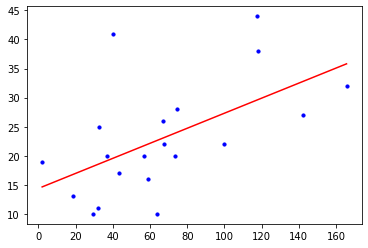

In [10]:
# Creating the graphs for 22-23 season
plt.scatter(windowAndSeasons[0]["Expenditure"], windowAndSeasons[0]["Points"], color = "blue", s = 10)

# Creating a linear model for the 22-23 season 
slope, intercept, r, p, std_error = stats.linregress(windowAndSeasons[0]["Expenditure"], windowAndSeasons[0]["Points"])

# Formulating the model
x_model = np.linspace(windowAndSeasons[0]["Expenditure"].min(), windowAndSeasons[0]["Expenditure"].max())
y_model = intercept + slope * x_model
plt.plot(x_model, y_model, color = "red")

print(f"Correlation: {windowAndSeasons[0].corr()['Expenditure']['Points']}\nR-squared: {r**2}\nP: {p}\nStandard Error:{std_error}")

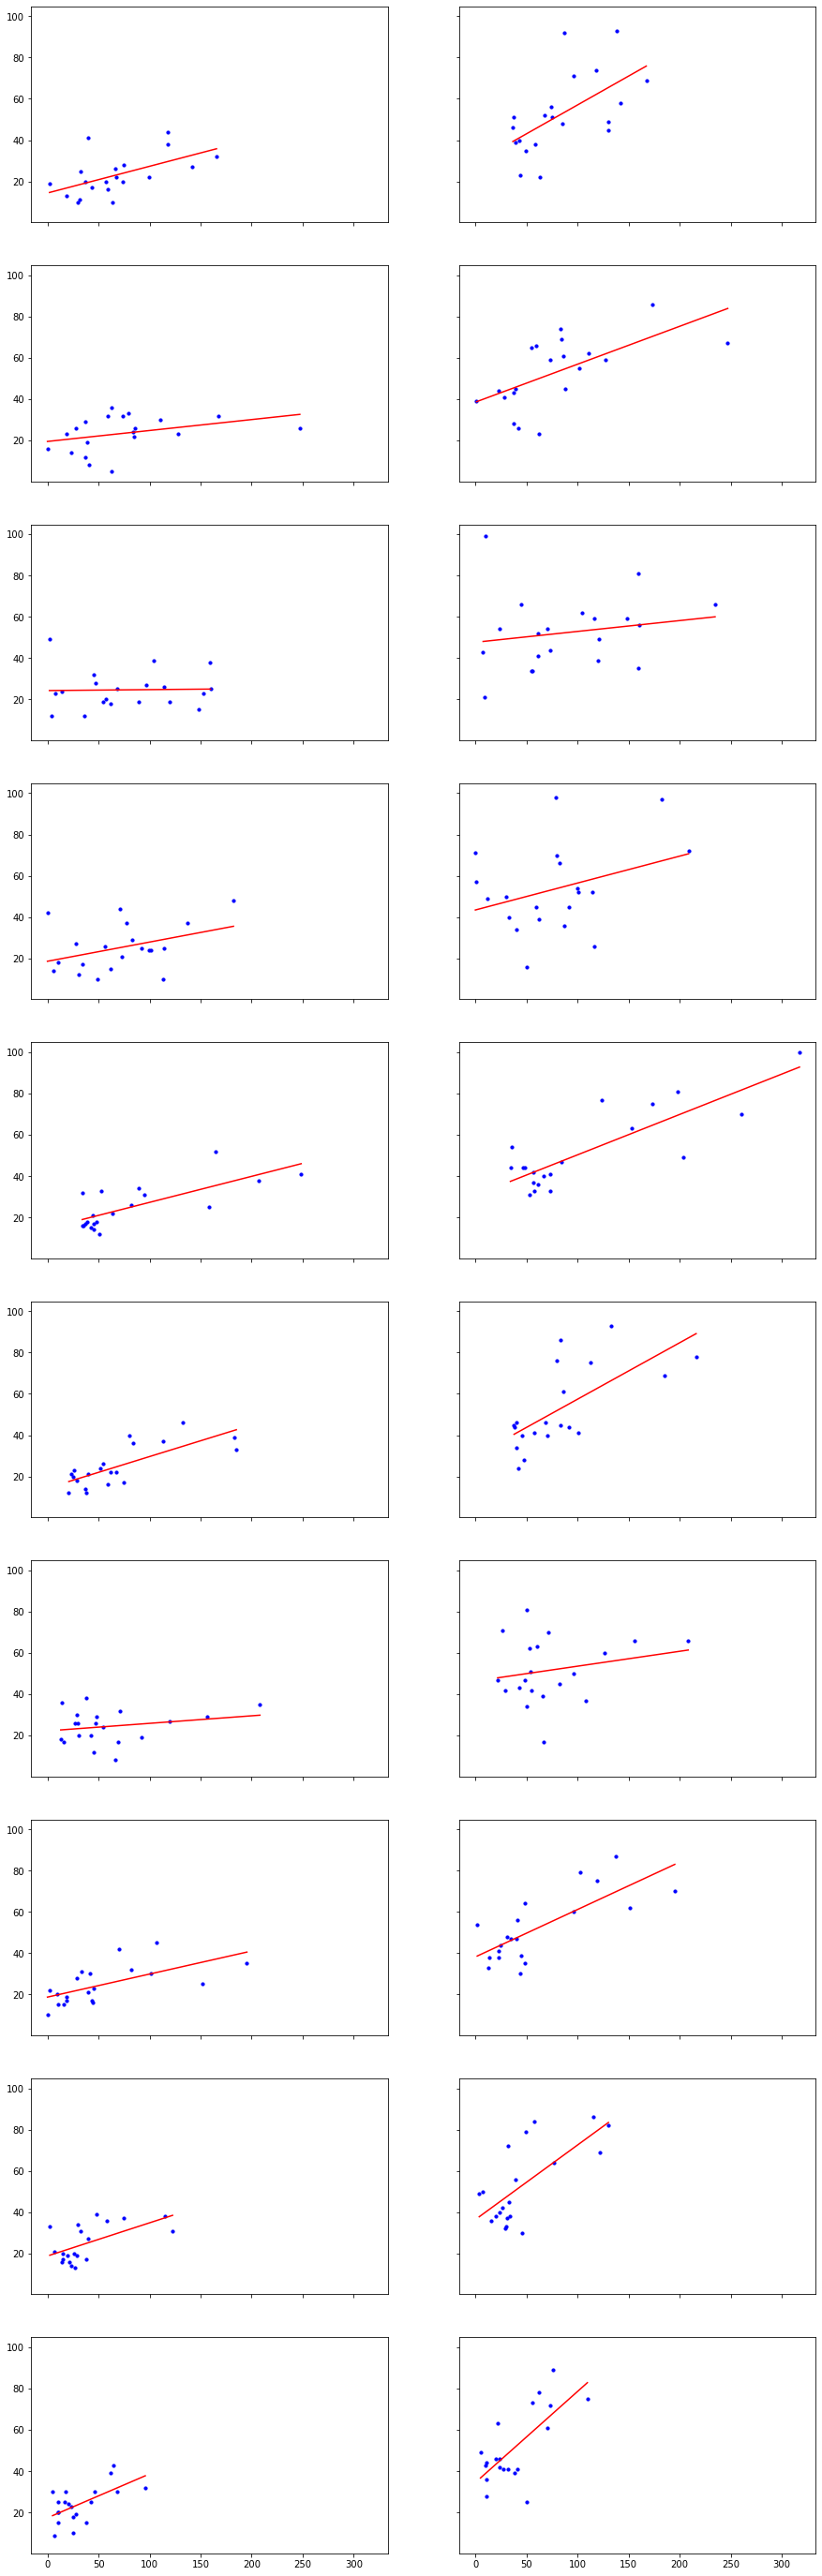

In [11]:
# Dictionary of graphical analysis
summary_plots = {}

# Subplots for all the graphs
fig, ((axs1, axs2), (axs3, axs4), (axs5, axs6), (axs7, axs8), (axs9, axs10), (axs11, axs12), (axs13, axs14), (axs15, axs16), (axs17, axs18), 
      (axs19, axs20))= plt.subplots(10, 2, sharex = True, sharey = True, figsize = (15, 50))
axs = [axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8, axs9, axs10, axs11, axs12, axs13, axs14, axs15, axs16, axs17, axs18, axs19, axs20]

for i, j in zip(range(0, len(noHalfSeasons), 2), range(1, len(noHalfSeasons), 2)):
    axs[i].scatter(noHalfSeasons[i]['Expenditure'], noHalfSeasons[i]["Points"], color = "blue", s = 10)
    axs[j].scatter(noHalfSeasons[j]["Expenditure"], noHalfSeasons[j]["Points"], color = "blue", s = 10)
    
    slope1, intercept1, r1, p1, std_error1 = stats.linregress(noHalfSeasons[i]["Expenditure"], noHalfSeasons[i]["Points"])
    slope2, intercept2, r2, p2, std_error2 = stats.linregress(noHalfSeasons[j]["Expenditure"], noHalfSeasons[j]["Points"])
    
    # Linear model for winter transfer window data
    x_model1 = np.linspace(noHalfSeasons[i]["Expenditure"].min(), noHalfSeasons[i]["Expenditure"].max())
    y_model1 = intercept1 + slope1 * x_model1
    axs[i].plot(x_model1, y_model1, color = "red")
    
    summary_plots[noHalfSeasons[i].iloc[0][1:2].name] = [noHalfSeasons[i].corr()['Expenditure']['Points'], r1, p1, std_error1]
    
    # Linear model for summer transfer window data
    x_model2 = np.linspace(noHalfSeasons[j]["Expenditure"].min(), noHalfSeasons[j]["Expenditure"].max())
    y_model2 = intercept2 + slope2 * x_model2
    axs[j].plot(x_model2, y_model2, color = "red")
    
    summary_plots[noHalfSeasons[j].iloc[0][1:2].name] = [noHalfSeasons[j].corr()['Expenditure']['Points'], r2, p2, std_error2]

In [12]:
sample_values_summer = {}
sample_values_winter = {}

# Sample correlation of non-half seasons for summer transfer windows
corr_summer = []
for tw in summary_plots:
    if "Summer" in tw:
        corr_summer.append(summary_plots[tw][0])
sample_values_summer["Correlation"] = sum(corr_summer)/len(corr_summer)

# Sample correlation of non-half seasons for winter transfer windows
corr_winter= []
for tw in summary_plots:
    if "Winter" in tw:
        corr_winter.append(summary_plots[tw][0])
sample_values_winter["Correlation"] = sum(corr_winter)/len(corr_winter)

# Sample r-squared of non-half seasons for summer transfer windows
r2_summer = []
for tw in summary_plots:
    if "Summer" in tw:
        r2_summer.append(summary_plots[tw][1])
sample_values_summer["R-Squared"] = sum(r2_summer)/len(r2_summer)

# Sample r-squared of non-half seasons for winter transfer windows
r2_winter= []
for tw in summary_plots:
    if "Winter" in tw:
        r2_winter.append(summary_plots[tw][1])
sample_values_winter["R-Squared"] = sum(r2_winter)/len(r2_winter)

# Sample p value of non-half seasons for summer transfer windows
p_summer = []
for tw in summary_plots:
    if "Summer" in tw:
        p_summer.append(summary_plots[tw][2])
sample_values_summer["p"] = sum(p_summer)/len(p_summer)

# Sample p valueof non-half seasons for winter transfer windows
p_winter= []
for tw in summary_plots:
    if "Winter" in tw:
        p_winter.append(summary_plots[tw][2])
sample_values_winter["p"] = sum(p_winter)/len(p_winter)

# Sample standard error of non-half seasons for summer transfer windows
std_error_summer = []
for tw in summary_plots:
    if "Summer" in tw:
        std_error_summer.append(summary_plots[tw][3])
sample_values_summer["Std Error"] = sum(std_error_summer)/len(std_error_summer)

# Sample standard error of non-half seasons for winter transfer windows
std_error_winter= []
for tw in summary_plots:
    if "Winter" in tw:
        std_error_winter.append(summary_plots[tw][3])
sample_values_winter["Std Error"] = sum(std_error_winter)/len(std_error_winter)

print(sample_values_summer)
print(sample_values_winter)

{'Correlation': 0.48276702988327064, 'R-Squared': 0.48276702988327075, 'p': 0.1504680103527134, 'Std Error': 0.042261982603620386}
{'Correlation': 0.5574040650735759, 'R-Squared': 0.5574040650735759, 'p': 0.09633755392042562, 'Std Error': 0.07215825122372174}


In [59]:
# Splitting the data set into X and Y values
X = []
for n in df.iloc[:, 3].values:
    X.append([n])
y = []
for n in df.iloc[:, 9].values:
    y.append([n])

In [60]:
# Splitting the data into train and test sets
X_train = X[20:]
X_test = X[:20]
y_train = y[20:]
y_test = y[:20]

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

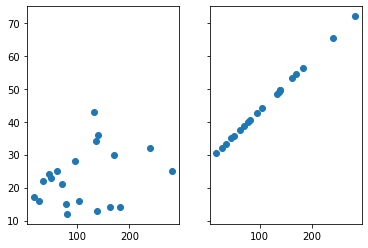

In [69]:
fig, ((axs1, axs2)) = plt.subplots(1, 2, sharex = True, sharey = True)

axs1.scatter(X_test, y_test)
axs2.scatter(X_test, y_pred)